In [2]:
import os
import re
import sys
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

In [18]:
def load_json_results(results_dir):
    '''
    Loads all results files in the given directory and merges them to a single pandas dataframe
    '''
    results_df = None
    for name in glob.glob(results_dir):
        fname: str = os.path.basename(name)
        if "result" in fname:
            parsed_text = fname.split("_")
            with open(name, "r") as f:
                results = json.load(f)    
                results["dataset"] = parsed_text[0]
                results["explainer"] = parsed_text[1]
                results["min_robust"] = float(parsed_text[2][1:])
                results["iteration"] = int(parsed_text[3])
                if results_df is None:
                    results_df = pd.DataFrame([results])
                else:
                    results_df = pd.concat([results_df, pd.DataFrame([results])])
    return results_df

In [19]:
do_merge = True
if do_merge:
    results_dir = "../results/vary-robustness/*"
    output_path = "../results/vary_robustness_merged.csv"
    results_df = load_json_results(results_dir)
    results_df.to_csv(output_path, index=False)
results_df.head()

,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain,dataset,explainer,min_robust,iteration
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.607242,0.180362,20,cancer,facetindex,0.00001,0
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.668953,0.183448,20,cancer,facetindex,0.00002,0
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.655817,0.182791,20,cancer,facetindex,0.00003,0
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.622642,0.181132,20,cancer,facetindex,0.00004,0
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.657733,0.182887,20,cancer,facetindex,0.00005,0


In [20]:
# read in data
df = pd.read_csv("../results/vary_robustness_merged.csv")
df.head()

,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain,dataset,explainer,min_robust,iteration
0,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.607242,0.180362,20,cancer,facetindex,0.00001,0
1,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.668953,0.183448,20,cancer,facetindex,0.00002,0
2,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.655817,0.182791,20,cancer,facetindex,0.00003,0
3,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.622642,0.181132,20,cancer,facetindex,0.00004,0
4,0.938596,0.95,0.883721,0.915663,1.0,0.200564,5.4,2.445971,3.657733,0.182887,20,cancer,facetindex,0.00005,0


In [21]:
# Group by minimum robustness, dataset taking the average across each iteration
df_grouped = df.groupby(["dataset", "min_robust"], as_index=False).mean() 
df_grouped["explainer"] = "facet"

# show results after 2
# df_grouped = df_grouped[(df_grouped['nconstr'] > 1)] 
print(df_grouped.shape) 
df_grouped[["explainer", "dataset", "min_robust", "explain_time", "sample_time"]]

(59, 15)


,explainer,dataset,min_robust,explain_time,sample_time
0,facet,cancer,0.00001,3.607242,0.180362
1,facet,cancer,0.00002,3.668953,0.183448
2,facet,cancer,0.00003,3.655817,0.182791
3,facet,cancer,0.00004,3.622642,0.181132
4,facet,cancer,0.00005,3.657733,0.182887
5,facet,cancer,0.00006,3.692769,0.184638
6,facet,cancer,0.00007,3.683175,0.184159
7,facet,cancer,0.00008,3.654410,0.182721
8,facet,cancer,0.00009,3.671920,0.183596
9,facet,cancer,0.00010,4.490192,0.224510


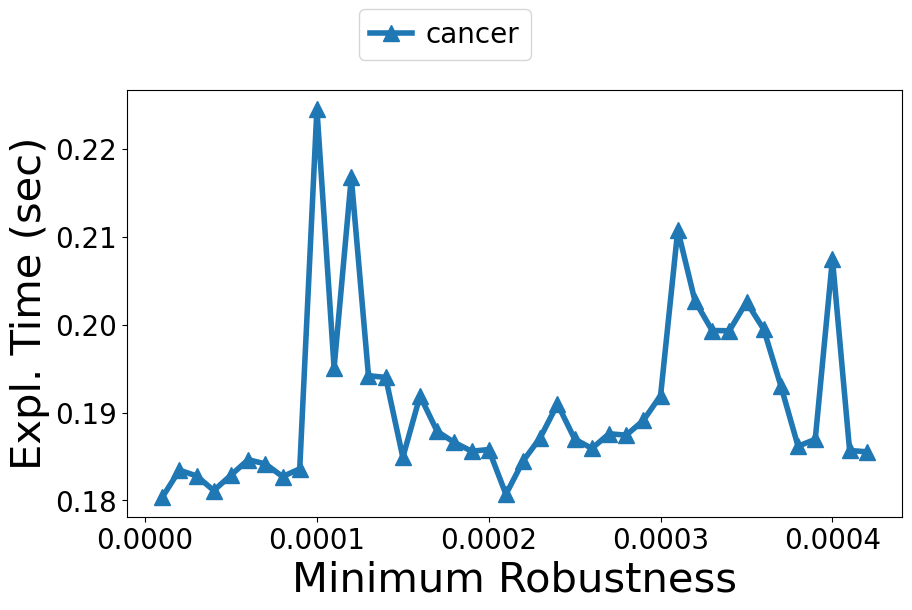

In [5]:
# create viz
fig = plt.figure(figsize=[10, 4.8], frameon=True)
ax = fig.add_subplot(1, 1, 1)
results = df_grouped
xfeature = "min_robust"
yfeature = "sample_time"
line_width = 4
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 12
line_width = 4
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}
title = None
xlabel = "Minimum Robustness"
ylabel = "Expl. Time (sec)"
lhorz = True
loc = "upper center"
xrange = None
yrange = None
ylog = False
xlog = False

for ds in results["dataset"].unique():
        is_ds = results["dataset"] == ds
        for expl in results["explainer"].unique():
            is_expl = results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax.plot(results[matching_rows][xfeature], results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])

        # title and axis labels
        if title is not None:
            plt.title(title)
        plt.xlabel(xlabel,fontsize=30)
        plt.ylabel(ylabel,fontsize=30)
        # legend
        if lhorz:
            plt.legend(loc=loc, ncol=len(results["dataset"].unique()), bbox_to_anchor=(0, 1.22, 0.82, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20})
        else:
            plt.legend(loc=loc)
        # x and y ranges
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        # x and y scales
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.subplots_adjust(top=1.0)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        # plt.xticks(np.arange(2, 22, 2))

# plt.savefig("vary_robust.pdf", bbox_inches="tight")

